# Tutorial 3

#### Exercise 1

1. Write a Python function which accepts a single argument representing an angle θ in radians
and returns the corresponding 2D rotation matrix by calling the appropriate function in
the Python Robotics toolbox.

In [4]:
import math
import numpy as np
from scipy import linalg, optimize
import matplotlib.pyplot as plt
from spatialmath import *
from spatialmath.base import *
from spatialmath.base import sym
from spatialgeometry import *
from roboticstoolbox import *

def rotation_matrix(theta):
    return rot2(theta)

theta = int(input("Give an angle in radians:"))
print(rotation_matrix(theta))

Give an angle in radians: 2


[[-0.41614684 -0.90929743]
 [ 0.90929743 -0.41614684]]


2. What is the type of the returned matrix (use the type Python function to figure it out)

In [6]:
def rotation_matrix(theta):
    return rot2(theta)

theta = int(input("Give an angle in radians:"))
print(type(rotation_matrix(theta)))

Give an angle in radians: 2


<class 'numpy.ndarray'>


3. Extend your function so that it accepts a second argument which is a string. If the string is 'deg' it calculates the rotation in degrees, otherwise if the string is 'rad' it calculates the rotation matrix in radians. For any other value of the second argument the function returns an error.

In [8]:
def rotation_matrix(theta, type): 
    if type == 'deg':
        return rot2(theta, 'deg')
    elif type == 'rad':
        return rot2(theta)
    else:
        print('Error, your input value must be rad or def')

theta = int(input("Give an angle:"))
type = input('Give rad/deg')

new_rotation = rotation_matrix(theta,type)

print(new_rotation)


Give an angle: 2
Give rad/deg rad


[[-0.41614684 -0.90929743]
 [ 0.90929743 -0.41614684]]


#### Exercise 2

Create a 1-dimensional numpy array from a Python list. Create two different 2-dimensional numpy arrays and multiply them together. Confirm that the result of the matrix multiplication is correct by doing the multiplication manually as well.

In [10]:


#a = np.array([[1,2],[3,4]])
#b = np.array([[2,4],[1,2]])
 
# print(a*b)
  
#user_list = list(input('Give a series of numbers'))
#array_1 = np.array(user_list)
#print(array_1)

a = np.array([[1,2,3],[3,4,1]])
b = np.array([[2,4,3],[1,2,1]])

print(a*b)

[[2 8 9]
 [3 8 1]]


#### Exercise 4

Write a Python function which accepts 2 arguments corresponding to angles (in degrees) and plots the reference frames after applying rotation with respect to the given angles. The first frame should be in blue colour and the second in red. Hint: Use the trplot2 function of the toolbox.

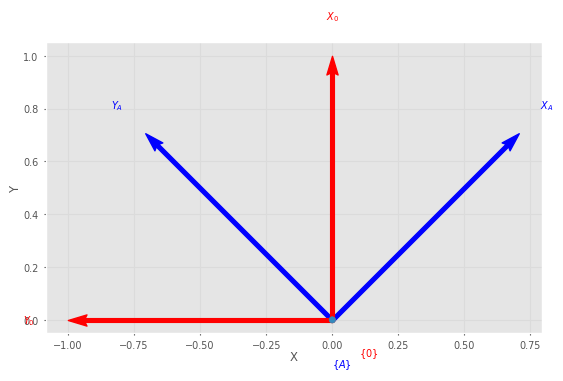

In [12]:


def plot_rotated(angle1,angle2):
    
    TA = rot2(angle1, 'deg')
    TO = rot2(angle2, 'deg')
    
    #plotvol2([0,5]);
    trplot2(TA, frame="A", color="b");
    trplot2(TO, frame="0", color="r");
    
plot_rotated(45,90)
    

#### Exercise 5

Without using the Robotics Toolbox write a Python function which accepts 2 arguments, an
angle θ and a list (txty) corresponding to a translation vector. The function should return the
3 × 3 homogeneous transformation for that angle and translation as a numpy array.


In [14]:
def homoTransf(theta, vecList):
    # get theta
    thisTheta = np.radians(theta)
    
    #create homogeneous
    res_array =([np.cos(thisTheta),-np.sin(thisTheta), vecList[0]],
                         [np.sin(thisTheta), np.cos(thisTheta), vecList[1]],
                         [0,0,1])
    print(res_array)

homoTransf(10,[0,1])

([0.984807753012208, -0.17364817766693033, 0], [0.17364817766693033, 0.984807753012208, 1], [0, 0, 1])


#### Exercise 6

A frame B is created by rotating a 3D frame A about the z axis by 70 degrees and translating
frame A by 20 units in axis x and 10 units in axis y.

1. Write some Python code which returns a numpy array corresponding to the homogeneous
transformation describing the above

In [5]:
import math
import numpy as np
from scipy import linalg, optimize
import matplotlib.pyplot as plt
from spatialmath import *
from spatialmath.base import *
from spatialmath.base import sym
from spatialgeometry import *
from roboticstoolbox import *
from sympy import *

theta = 70
vecListZ = (20, 10, 0)  

R = np.array([[np.cos(np.radians(theta)), -np.sin(np.radians(theta)), 0, vecListZ[0]], 
              [np.sin(np.radians(theta)),  np.cos(np.radians(theta)), 0, vecListZ[1]],  
              [0, 0,      1, vecListZ[2]],  # (z-axis, no rotation)
              [0,  0,    0, 1]])           

# Output the result
simplify(R)


[[0.342020143325669, -0.939692620785908, 0.0, 20.0], [0.939692620785908, 0.342020143325669, 0.0, 10.0], [0.0, 0.0, 1.0, 0.0], [0.0, 0.0, 0.0, 1.0]]

2. A point $P$ has the following coordinates with respect to frame $B$: (3.1, 8, 2).

Calculate the coordinates of point $P$ with respect to frame $A$ using the homogeneous transformation you calculated previously.

**Hint**: Use the ```math.radians``` function to convert degrees to radians (see ```help(math.radians)```)

In [30]:
import math
import numpy as np
from scipy import linalg, optimize
import matplotlib.pyplot as plt
from spatialmath import *
from spatialmath.base import *
from spatialmath.base import sym
from spatialgeometry import *
from roboticstoolbox import *

theta = 70
vecListZ = (20, 10, 0)  # Translation vector [x, y, z]

# Rotation matrix around z-axis
cos_theta = np.cos(np.radians(theta))
sin_theta = np.sin(np.radians(theta))

# Homogeneous transformation matrix
R = [[cos_theta, -sin_theta, 0, vecListZ[0]],  # Row 1: Rotation + Translation in x
     [sin_theta,  cos_theta, 0, vecListZ[1]],  # Row 2: Rotation + Translation in y
     [0,         0,          1, vecListZ[2]],  # Row 3: No rotation in z, just translation
     [0,         0,          0, 1]]            # Row 4: Homogeneous coordinates

# Point in frame A
point_A = [3.1, 8, 2, 1]  # Homogeneous coordinates of the point

# Perform the matrix multiplication manually
point_B_x = R[0][0] * point_A[0] + R[0][1] * point_A[1] + R[0][2] * point_A[2] + R[0][3] * point_A[3]  # New x
point_B_y = R[1][0] * point_A[0] + R[1][1] * point_A[1] + R[1][2] * point_A[2] + R[1][3] * point_A[3]  # New y
point_B_z = R[2][0] * point_A[0] + R[2][1] * point_A[1] + R[2][2] * point_A[2] + R[2][3] * point_A[3]  # New z
point_B_w = R[3][0] * point_A[0] + R[3][1] * point_A[1] + R[3][2] * point_A[2] + R[3][3] * point_A[3]  # Homogeneous coordinate - should be 1 (?)

# Output the new point coordinates in frame B
print(f"Coordinates of the point in frame B: ({point_B_x}, {point_B_y}, {point_B_z}, {point_B_w})")

trial1 = cos_theta * 3.1 + -sin_theta * 8 + 0 * 2 + 20 * 1
trial2 = sin_theta * 3.1 + cos_theta * 8 + 0 * 2 + 10 * 1
trial3 = 0 * 3.1 + 0 * 8 + 1 *2 + 0 * 1 
trial4 = 0 * 3.1 + 0 * 8 + 0 * 2 + 1 * 1

pointP_A = (point_B_x, point_B_y, point_B_z)

print(np.matrix(pointP_A))
#simplify(pointP_A)
print(trial1,trial2, trial3, trial4)



Coordinates of the point in frame B: (13.542721478022306, 15.649208271041667, 2.0, 1.0)
[[13.54272148 15.64920827  2.        ]]
13.542721478022306 15.649208271041667 2.0 1.0


In [28]:
import math
import numpy as np
from scipy import linalg, optimize
import matplotlib.pyplot as plt
from spatialmath import *
from spatialmath.base import *
from spatialmath.base import sym
from spatialgeometry import *
from roboticstoolbox import *

theta = 70
vecListZ = (20, 10, 0)  # Translation vector [x, y, z]

# Rotation matrix around z-axis
cos_theta = np.cos(np.radians(theta))
sin_theta = np.sin(np.radians(theta))

# Homogeneous transformation matrix
R = [[cos_theta, -sin_theta, 0, vecListZ[0]],  # Row 1: Rotation + Translation in x
     [sin_theta,  cos_theta, 0, vecListZ[1]],  # Row 2: Rotation + Translation in y
     [0,         0,          1, vecListZ[2]],  # Row 3: No rotation in z, just translation
     [0,         0,          0, 1]]            # Row 4: Homogeneous coordinates

# Point in frame A
point_A = [3.1, 8, 2, 1]  # Homogeneous coordinates of the point

# Perform the matrix multiplication 
point_B_x = R[0][0] * point_A[0] + R[0][1] * point_A[1] + R[0][2] * point_A[2] + R[0][3] * point_A[3]  # New x
point_B_y = R[1][0] * point_A[0] + R[1][1] * point_A[1] + R[1][2] * point_A[2] + R[1][3] * point_A[3]  # New y
point_B_z = R[2][0] * point_A[0] + R[2][1] * point_A[1] + R[2][2] * point_A[2] + R[2][3] * point_A[3]  # New z
point_B_w = R[3][0] * point_A[0] + R[3][1] * point_A[1] + R[3][2] * point_A[2] + R[3][3] * point_A[3]  # Homogeneous coordinate - should be 1

# Output the new point coordinates in frame B
print(f"Coordinates of the point in frame B: ({"%.2f"%point_B_x}, {"%.2f"%point_B_y}, {"%.2f"%point_B_z}(, {"%.2f"%point_B_w}))")

pointP_A = ("%.2f"%point_B_x, "%.2f"%point_B_y, "%.2f"%point_B_z, "%.2f"%point_B_w)

print(np.matrix(pointP_A))




Coordinates of the point in frame B: (13.54, 15.65, 2.00(, 1.00))
[['13.54' '15.65' '2.00' '1.00']]


### Explanation:

1. **Rotation matrix**: 
   \[
   \begin{bmatrix}
   \cos(\theta) & -\sin(\theta) & 0 & 0 \\
   \sin(\theta) & \cos(\theta)  & 0 & 0 \\
   0            & 0             & 1 & 0 \\
   0            & 0             & 0 & 1 \\
   \end{bmatrix}
   \]
   This handles the rotation part.

2. **Translation**:
   - The translation part is added as $[20, 10, 0]$ in the last column of the transformation matrix.

3. **Manual multiplication**:
   - Each component of the new point coordinates is computed manually:
     $$
     \\x_B = (R_{00} \cdot x_A) + (R_{01} \cdot y_A) + (R_{02} \cdot z_A) + (R_{03} \cdot 1)
     $$
     and similarly for $y_B$ and $z_B$.


     \[
   \begin{bmatrix}
   \cos(\theta) & -\sin(\theta) & 0 & 20 \\
   \sin(\theta) & \cos(\theta)  & 0 & 10 \\
   0            & 0             & 1 & 0 \\
   0            & 0             & 0 & 1 \\
   \end{bmatrix}                          *  \begin{bmatrix}
   3.1\\
   8\\
   2\\
   1\\
   \end{bmatrix}
   \]
   \]


5. **Result**: The output gives you the transformed coordinates of the point in frame `B`.


#### Step-by-step process:

1. **Homogenous transformation matrix $T$

---

<Axes3D: xlabel='X', ylabel='Y', zlabel='Z'>

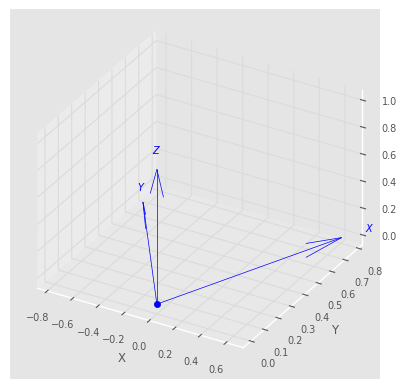

In [20]:
import math
import numpy as np
from scipy import linalg, optimize
import matplotlib.pyplot as plt
from spatialmath import *
from spatialmath.base import *
from spatialmath.base import sym
from spatialgeometry import *
from roboticstoolbox import *

R = rotz(70)
trplot(R)

In [22]:
import math
import numpy as np
from scipy import linalg, optimize
import matplotlib.pyplot as plt
from spatialmath import *
from spatialmath.base import *
from spatialmath.base import sym
from spatialgeometry import *
from roboticstoolbox import *
from sympy import *

theta = Symbol('theta')
simplify(transl2(5,2) @ trot2(theta))

[[1.0*cos(theta), -1.0*sin(theta), 5.0], [1.0*sin(theta), 1.0*cos(theta), 2.0], [0, 0, 1.0]]

In [24]:
simplify( trot2(theta)@ transl2(5,2))

[[1.0*cos(theta), -1.0*sin(theta), -2.0*sin(theta) + 5.0*cos(theta)], [1.0*sin(theta), 1.0*cos(theta), 5.0*sin(theta) + 2.0*cos(theta)], [0.0, 0.0, 1.0]]